# Flight Delay Analysis

This notebook analyses the flight delay data from January 2016, obtained from [here](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time). In the second part of this report, a machine learning model is constructed to predict flight cancellations from January-March 2016.
No flight data was sanitized beforehand. 

In [1]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
import seaborn as sns
%matplotlib inline

import matplotlib.style
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('C:/Users/zhanghui/Desktop/datatonic/flights_small.csv')

In [3]:
df.head()

,Date,Airline,Airline_code,Arrival_airport,Arrival_state,Departure_Airport,Departure_State,Departure_actual,Departure_delay,Arrival_actual,Arrival_delay,Arrival_schedule,Departure_schedule,DC_Longitude,DC_Latitude,Longitude,Latitude,Route,Path_order
0,2003-04-05,EV,20366,SHV,LA,MOB,AL,1820,-10,2048,30,2018,1830,-88.24,30.69,-88.24,30.69,AL to LA,1
1,2006-04-10,YV,20378,CLT,NC,MGM,AL,1613,-10,1833,-9,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
2,2006-04-05,YV,20378,CLT,NC,MGM,AL,1615,-8,1825,-17,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
3,2006-01-12,YV,20378,CLT,NC,MGM,AL,1620,-3,1840,1,1839,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
4,2006-01-05,YV,20378,CLT,NC,MGM,AL,1614,0,1840,10,1830,1614,-86.39,32.30,-86.39,32.30,AL to NC,1


In [ ]:
# Part 1: let's first have a check about each column of the data

In [111]:
#List of Airelines with corresponding Aireline Codes 
#The number of Airelines is 23

In [79]:
df['Airline'].unique(), df['Airline'].value_counts().count()

(array(['EV', 'YV', 'XE', 'OO', 'CO', 'F9', 'HP', 'TZ', 'UA', 'US', 'WN',
        'DL', 'FL', 'MQ', 'AA', 'NW', 'B6', 'VX', 'AS', 'OH', '9E', 'HA',
        'DH'], dtype=object), 23)

In [80]:
df['Airline_code'].unique(), df['Airline_code'].value_counts().count()

(array([20366, 20378, 20374, 20304, 19704, 20436, 19991, 20312, 19977,
        20355, 19393, 19790, 20437, 20398, 19805, 19386, 20409, 21171,
        19930, 20417, 20363, 19690, 20404], dtype=int64), 23)

In [110]:
#List of Arrival Airports 
#The number of Arrival Airports is 19

In [28]:
df['Arrival_airport'].unique(), df['Arrival_airport'].value_counts().count()

(array(['SHV', 'CLT', 'SFO', 'DEN', 'ATL', 'PIT', 'PHL', 'PHX', 'SAN',
        'CVG', 'BOS', 'TUL', 'PDX', 'PNS', 'SAV', 'COU', 'DAB', 'SJT', 'CYS'], dtype=object),
 19)

In [109]:
#List of Arrival States 
#The number of Arrival states is 15

In [29]:
df['Arrival_state'].unique(), df['Arrival_state'].value_counts().count()

(array(['LA', 'NC', 'CA', 'CO', 'GA', 'PA', 'AZ', 'KY', 'MA', 'OK', 'OR',
        'FL', 'MO', 'TX', 'WY'], dtype=object), 15)

In [112]:
#List of Departure Airports 
#The number of Departure Airports is 99

In [30]:
df['Departure_Airport'].unique(), df['Departure_Airport'].value_counts().count()

(array(['MOB', 'MGM', 'XNA', 'TUS', 'PHX', 'SFO', 'LAX', 'SAN', 'OAK',
        'PSP', 'SNA', 'DEN', 'COS', 'EGE', 'BDL', 'TPA', 'MCO', 'FLL',
        'MIA', 'JAX', 'RSW', 'PBI', 'PNS', 'SRQ', 'ATL', 'SAV', 'HNL',
        'LIH', 'OGG', 'CID', 'BOI', 'IDA', 'ORD', 'MDW', 'IND', 'SBN',
        'CVG', 'SDF', 'MLU', 'MSY', 'BOS', 'ACK', 'BWI', 'PWM', 'DTW',
        'LAN', 'MSP', 'STL', 'MCI', 'BIL', 'BZN', 'RDU', 'CLT', 'AVL',
        'GSO', 'LNK', 'MHT', 'EWR', 'ABQ', 'LAS', 'JFK', 'LGA', 'ALB',
        'ROC', 'BUF', 'ISP', 'CMH', 'CLE', 'TUL', 'LAW', 'PDX', 'OTH',
        'EUG', 'PHL', 'PIT', 'ABE', 'MDT', 'SJU', 'PVD', 'CAE', 'FSD',
        'MEM', 'BNA', 'CHA', 'IAH', 'AUS', 'DAL', 'DFW', 'HOU', 'SLC',
        'IAD', 'DCA', 'ORF', 'RIC', 'PHF', 'SEA', 'GRB', 'MKE', 'CPR'], dtype=object),
 99)

In [113]:
#List of Departure States 
#The number of Departure States is 44

In [31]:
df['Departure_State'].unique(), df['Departure_State'].value_counts().count()

(array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID',
        'IL', 'IN', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MT',
        'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
        'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WY'], dtype=object),
 44)

In [ ]:
# Part 2: Flight-delays details exploration  

In [184]:
# How are the flights delays by Airline

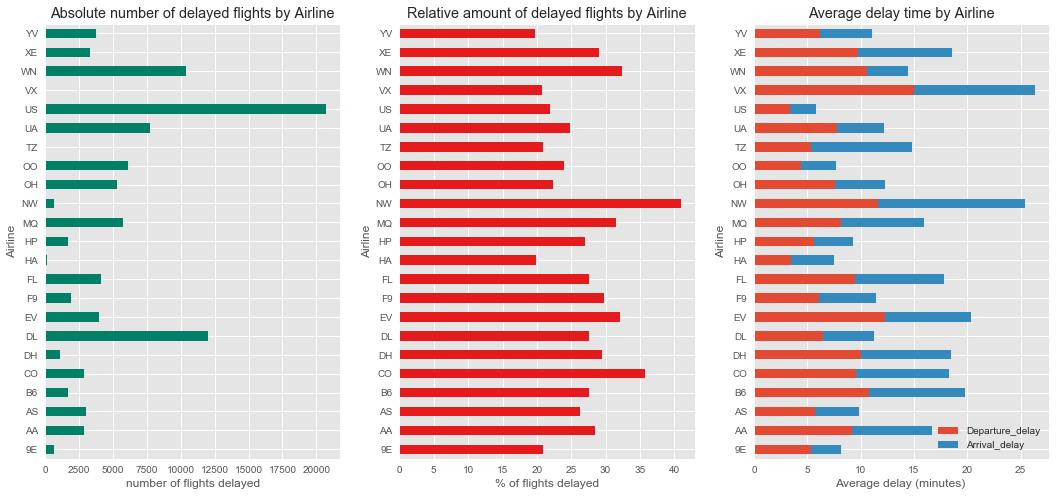

In [97]:
# Create a delayed flights list by Airline
d_flights = df[(df['Departure_delay'] > 0) & (df['Arrival_delay'] > 0)]
delayed_flights_by_carrier = d_flights.groupby(by=['Airline']).size()

# All flights list by Airline
flights_by_carrier = df.groupby(by=['Airline']).size()

# Average delay time by Airline 
flight_delays_by_carrier_time = df[['Airline'] + ['Departure_delay'] + ['Arrival_delay']].groupby(by=['Airline']).agg('mean')

# Create compared chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))

ax1 = flights_by_carrier.plot(kind='barh', title='Absolute number of delayed flights by Airline', 
                            ax=axes[0], colormap='summer')
ax1.set_xlabel("number of flights delayed")
ax1.set_ylabel("Airline")


ax2 = ((delayed_flights_by_carrier / flights_by_carrier) * 100).plot(kind='barh', \
                                                                      title='Relative amount of delayed flights by Airline',
                                                                         ax=axes[1],
                                                                        colormap='Set1')
ax2.set_ylabel("Airline")
ax2.set_xlabel("% of flights delayed")

ax3 = flight_delays_by_carrier_time.plot(kind='barh', title='Average delay time by Airline', stacked=True, ax=axes[2])
ax3.set_ylabel('Airline')
ax3.set_xlabel('Average delay (minutes) ')

In [ ]:
# From the charts above, we can conclude that WN and DL have the worst delays, while US has the most number of delays, but it
#has not a large relative amount of delays (around 1/4) or a long average delay time (around 6 mins) either. 

In [ ]:
# How are the flights delays by Departure_Airport

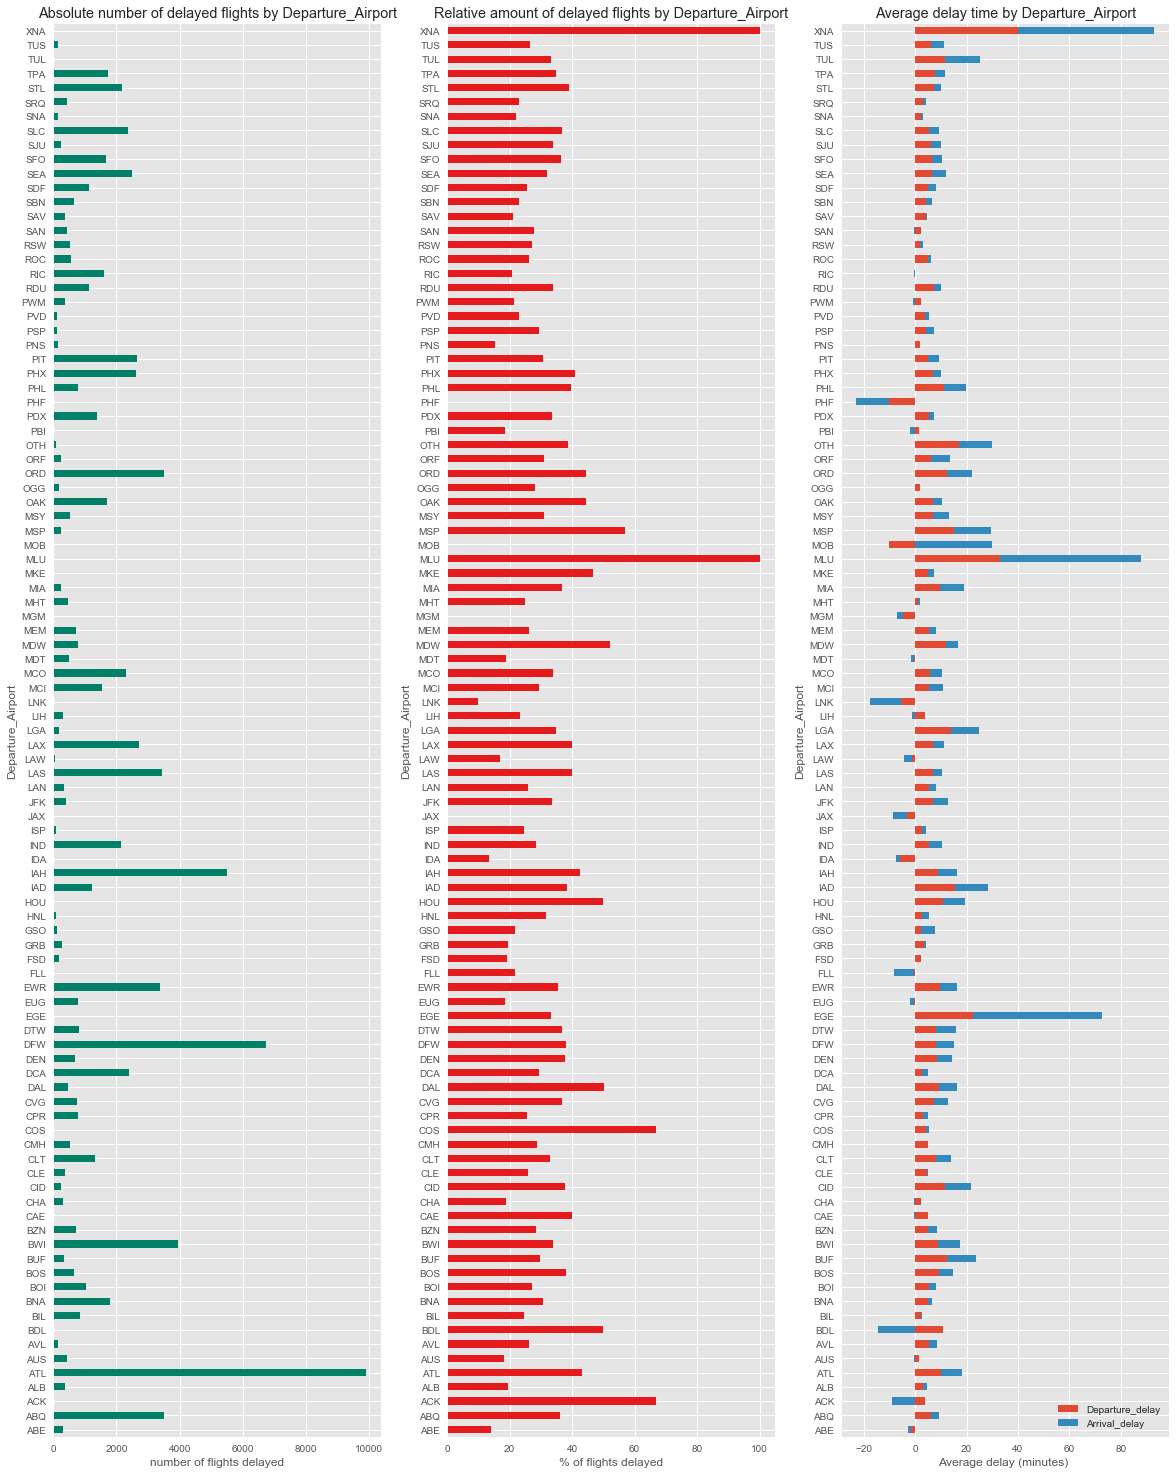

In [121]:
# Create a delayed flights list by Departure_Airport
d_flights = df[(df['Departure_delay'] > 0)]
delayed_flights_by_airports = d_flights.groupby(by=['Departure_Airport']).size()

# All flights list by Departure_Airport
flights_by_departure_airport = df.groupby(by=['Departure_Airport']).size()

# Average delay time by Departure_Airport 
average_delay_time_by_Departure_Airport = df[['Departure_Airport'] + ['Departure_delay'] + ['Arrival_delay']].groupby(by=['Departure_Airport']).agg('mean')


# Create compared chart 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,26))

ax1 = flights_by_departure_airport.plot(kind='barh', title='Absolute number of delayed flights by Departure_Airport', 
                            ax=axes[0], colormap='summer')
ax1.set_xlabel("number of flights delayed")
ax1.set_ylabel("Departure_Airport")


ax2 = ((delayed_flights_by_airports / flights_by_departure_airport) * 100).plot(kind='barh', \
                                                                      title='Relative amount of delayed flights by Departure_Airport',
                                                                         ax=axes[1],
                                                                        colormap='Set1')
ax2.set_ylabel("Departure_Airport")
ax2.set_xlabel("% of flights delayed")

ax3 = average_delay_time_by_Departure_Airport.plot(kind='barh', title='Average delay time by Departure_Airport', stacked=True, ax=axes[2])
ax3.set_ylabel('Departure_Airport')
ax3.set_xlabel('Average delay (minutes) ')

In [ ]:
# How are the flights delays by Arrival_airport

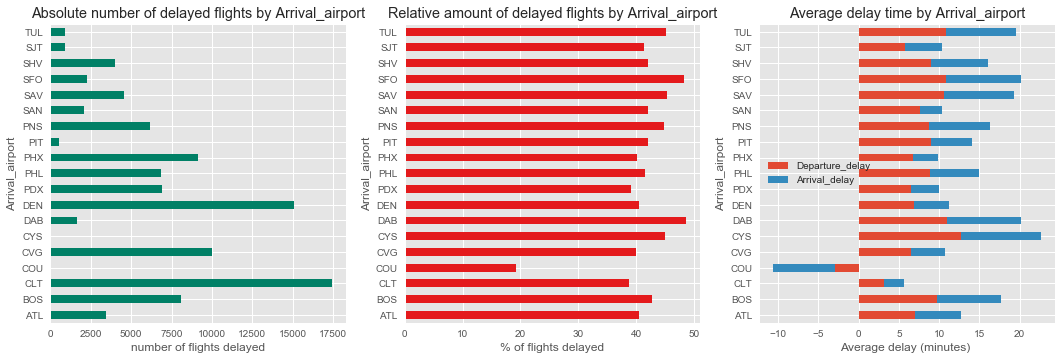

In [179]:
# Create a delayed flights list by Arrival_airport
d_flights = df[(df['Arrival_delay'] > 0)]
delayed_flights_by_airports = d_flights.groupby(by=['Arrival_airport']).size()

# All flights list by Arrival_airport
flights_by_arrival_airport = df.groupby(by=['Arrival_airport']).size()

# Average delay time by Arrival_airport 
average_delay_time_by_Arrival_airport = df[['Arrival_airport'] + ['Departure_delay'] + ['Arrival_delay']].groupby(by=['Arrival_airport']).agg('mean')

# Create compared chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5.5))

ax1 = flights_by_arrival_airport.plot(kind='barh', title='Absolute number of delayed flights by Arrival_airport', 
                            ax=axes[0], colormap='summer')
ax1.set_xlabel("number of flights delayed")
ax1.set_ylabel("Arrival_airport")


ax2 = ((delayed_flights_by_airports / flights_by_arrival_airport) * 100).plot(kind='barh', \
                                                                      title='Relative amount of delayed flights by Arrival_airport',
                                                                         ax=axes[1],
                                                                        colormap='Set1')
ax2.set_ylabel("Arrival_airport")
ax2.set_xlabel("% of flights delayed")

ax3 = average_delay_time_by_Arrival_airport.plot(kind='barh', title='Average delay time by Arrival_airport', stacked=True, ax=axes[2])
ax3.legend(loc='center left')
ax3.set_ylabel('Arrival_airport')
ax3.set_xlabel('Average delay (minutes) ')

In [ ]:
# How are the flights delays by Departure_State

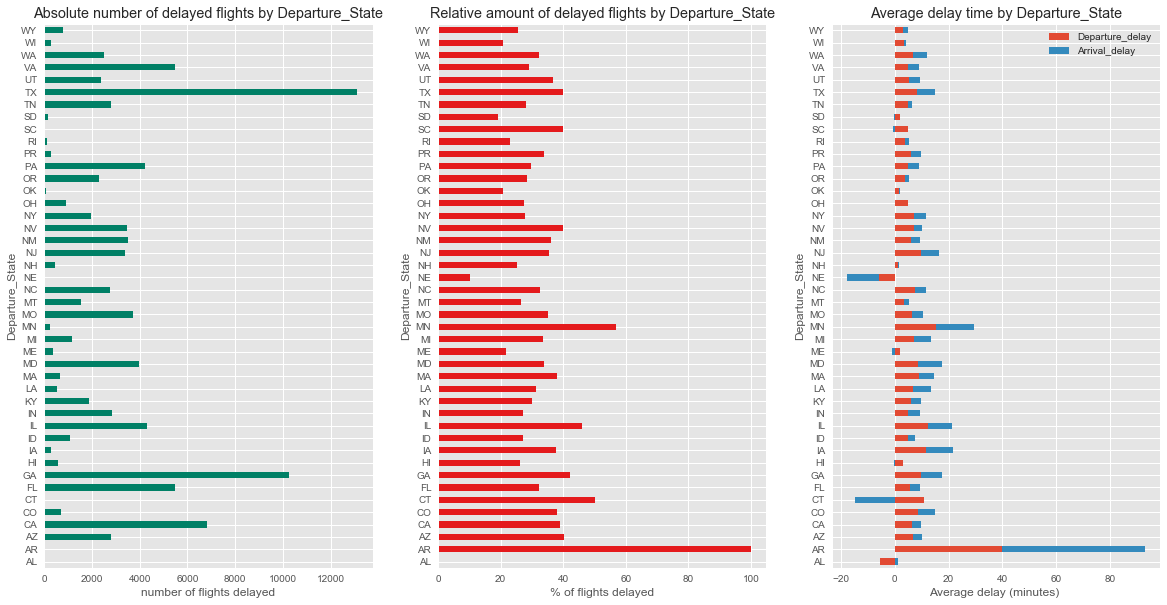

In [109]:
# Create a delayed flights list by Departure_State
d_flights = df[(df['Departure_delay'] > 0)]
delayed_flights_by_Departure_State = d_flights.groupby(by=['Departure_State']).size()

# All flights list by Departure_State
flights_by_Departure_State = df.groupby(by=['Departure_State']).size()

# Average delay time by Departure_State 
average_delay_time_by_Departure_State = df[['Departure_State'] + ['Departure_delay'] + ['Arrival_delay']].groupby(by=['Departure_State']).agg('mean')

# Create compared chart 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

ax1 = flights_by_Departure_State.plot(kind='barh', title='Absolute number of delayed flights by Departure_State', 
                            ax=axes[0], colormap='summer')
ax1.set_xlabel("number of flights delayed")
ax1.set_ylabel("Departure_State")


ax2 = ((delayed_flights_by_Departure_State / flights_by_Departure_State) * 100).plot(kind='barh', \
                                                                      title='Relative amount of delayed flights by Departure_State',
                                                                         ax=axes[1],
                                                                        colormap='Set1')
ax2.set_ylabel("Departure_State")
ax2.set_xlabel("% of flights delayed")

ax3 = average_delay_time_by_Departure_State.plot(kind='barh', title='Average delay time by Departure_State', stacked=True, ax=axes[2])
ax3.set_ylabel('Departure_State')
ax3.set_xlabel('Average delay (minutes) ')

In [172]:
# How are the flights delays by Arrival_state

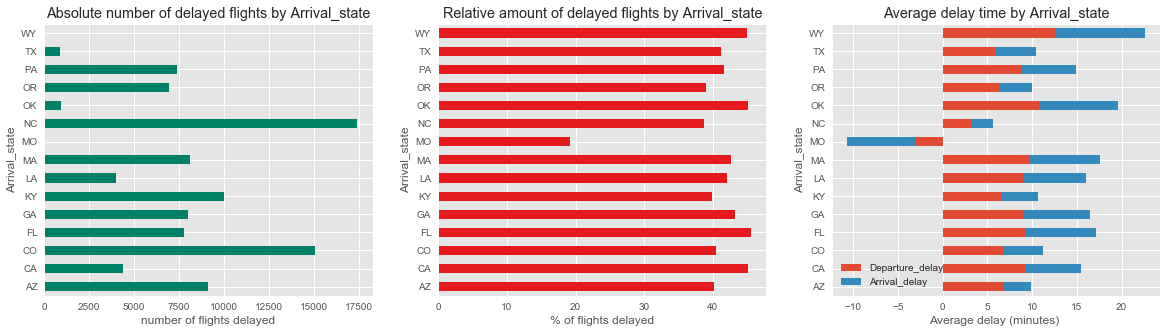

In [132]:
# Create a delayed flights list by Arrival_state
d_flights = df[(df['Arrival_delay'] > 0)]
delayed_flights_by_Arrival_state = d_flights.groupby(by=['Arrival_state']).size()

# All flights list by Arrival_state
flights_by_Arrival_state = df.groupby(by=['Arrival_state']).size()

# Average delay time by Arrival_state 
average_delay_time_by_Arrival_state = df[['Arrival_state'] + ['Departure_delay'] + ['Arrival_delay']].groupby(by=['Arrival_state']).agg('mean')

# Create compared chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax1 = flights_by_Arrival_state.plot(kind='barh', title='Absolute number of delayed flights by Arrival_state', 
                            ax=axes[0], colormap='summer')
ax1.set_xlabel("number of flights delayed")
ax1.set_ylabel("Arrival_state")


ax2 = ((delayed_flights_by_Arrival_state / flights_by_Arrival_state) * 100).plot(kind='barh', \
                                                                      title='Relative amount of delayed flights by Arrival_state',
                                                                         ax=axes[1],
                                                                        colormap='Set1')
ax2.set_ylabel("Arrival_state")
ax2.set_xlabel("% of flights delayed")

ax3 = average_delay_time_by_Arrival_state.plot(kind='barh', title='Average delay time by Arrival_state', stacked=True, ax=axes[2])
ax3.legend(loc='lower left')
ax3.set_ylabel('Arrival_state')
ax3.set_xlabel('Average delay (minutes) ')

In [ ]:
# How are the flights delays by Route 

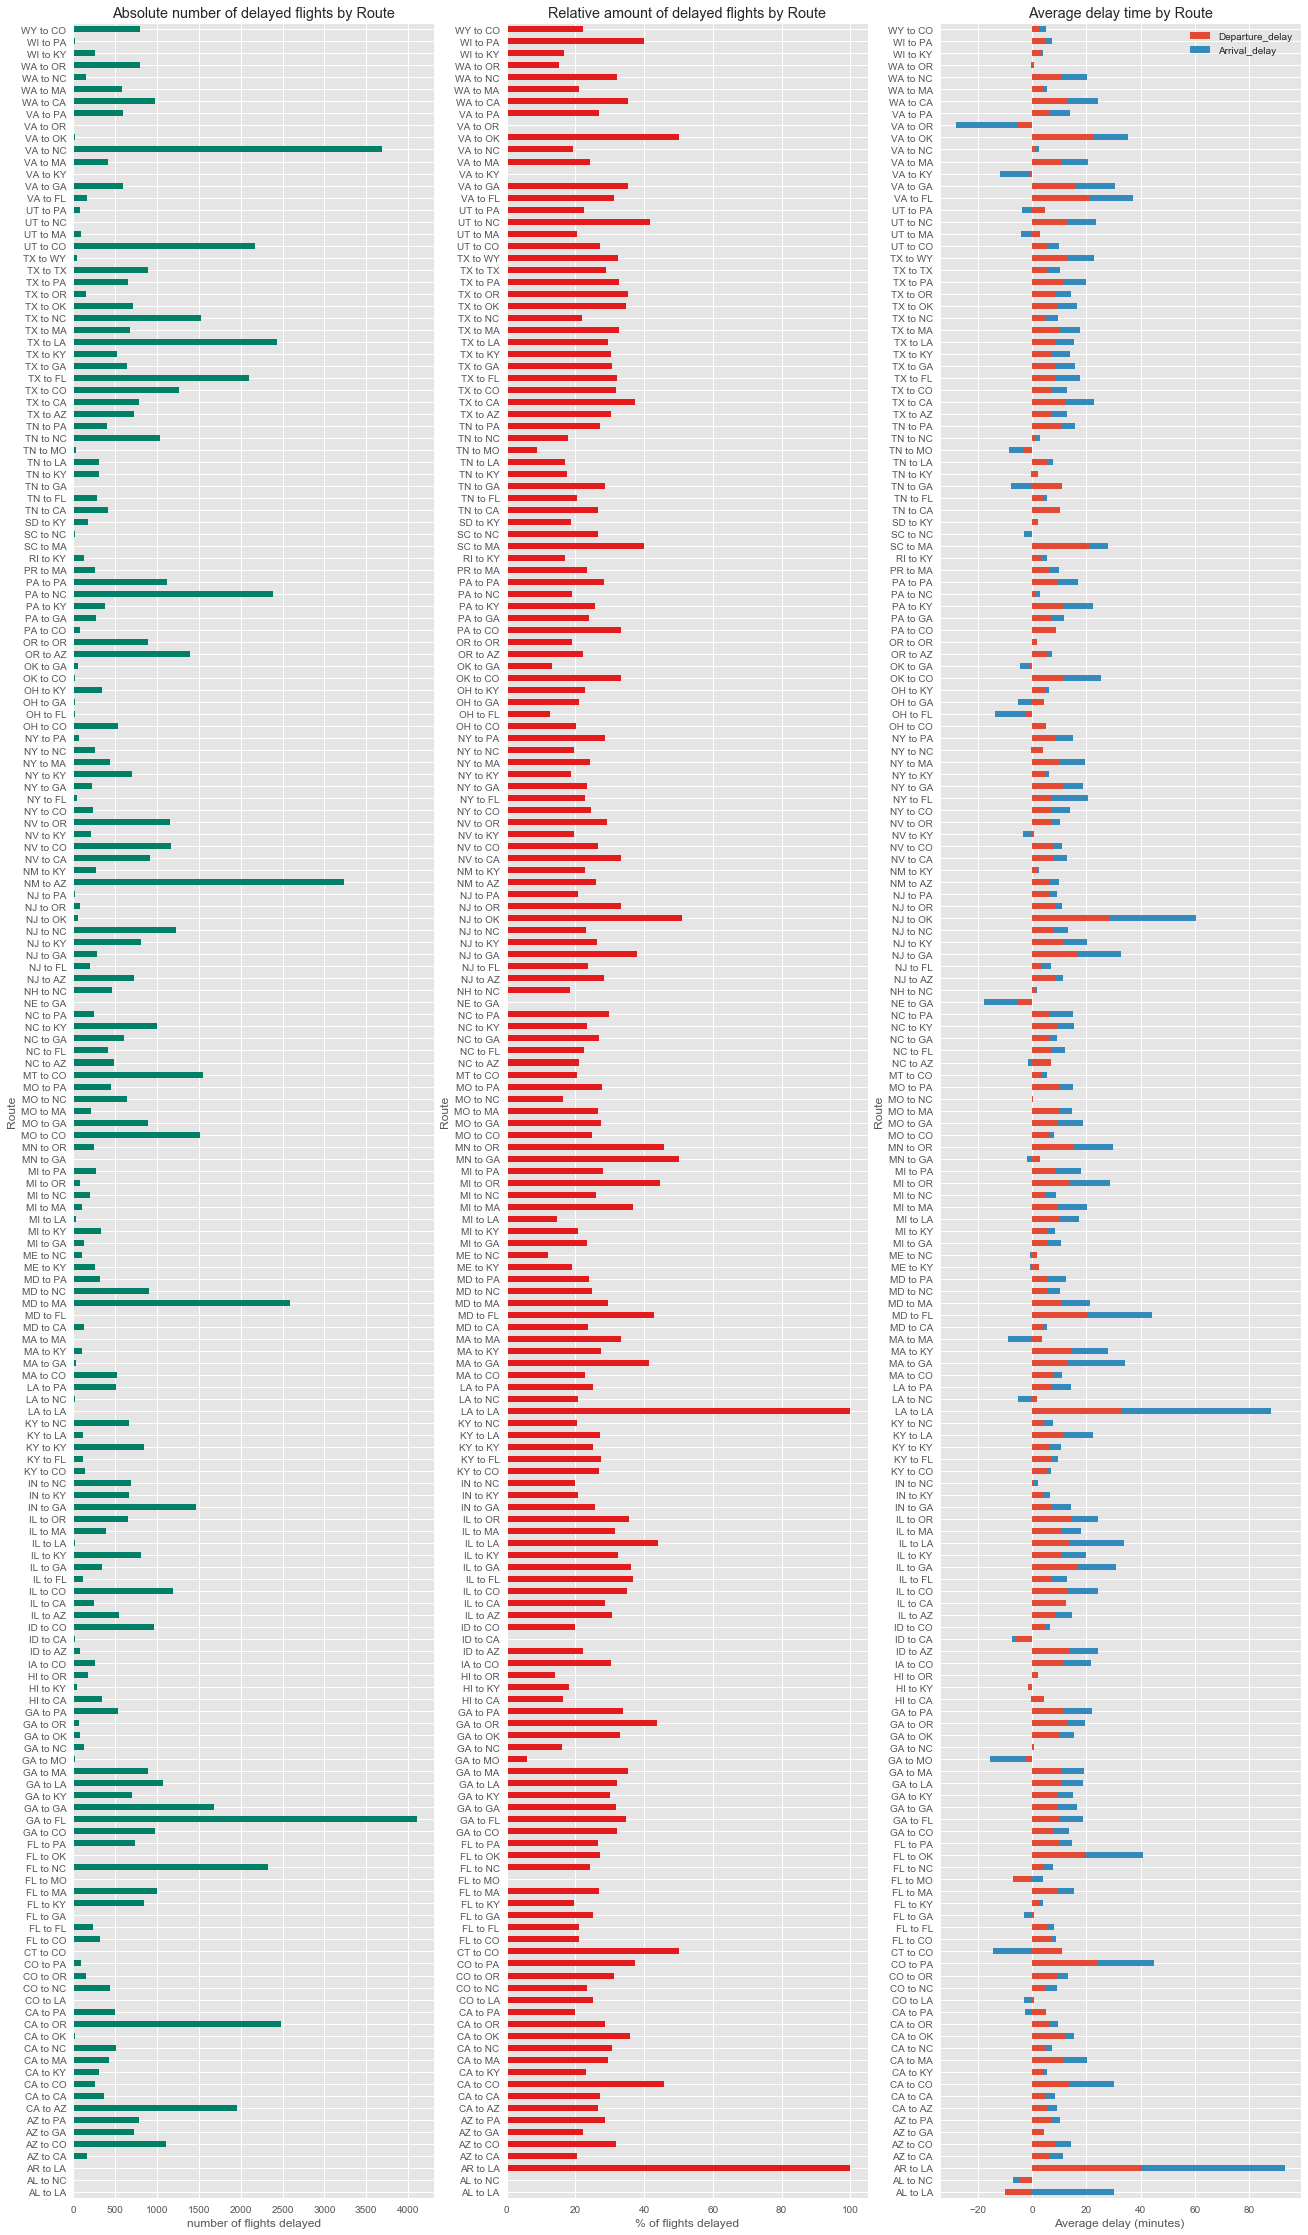

In [119]:
# Create a delayed flights list by Route 
d_flights = df[(df['Departure_delay'] > 0) & (df['Arrival_delay'] > 0)]
delayed_flights_by_route = d_flights.groupby(by=['Route']).size()

# All flights list by Route 
flights_by_route = df.groupby(by=['Route']).size()

# Average delay time by Route 
average_delay_time_by_Route = df[['Route'] + ['Departure_delay'] + ['Arrival_delay']].groupby(by=['Route']).agg('mean')

# Create compared chart 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,40))

ax1 = ((delayed_flights_by_route / flights_by_route) * 100).plot(kind='barh', 
                                                                 title='Relative amount of delayed flights by Route',
                                                                 ax=axes[1],
                                                                colormap='Set1')
ax1.set_ylabel("Route")
ax1.set_xlabel("% of flights delayed")

ax2 = flights_by_route.plot(kind='barh', title='Absolute number of delayed flights by Route', ax=axes[0], colormap='summer')
ax2.set_xlabel("number of flights delayed")
ax2.set_ylabel("Route")

ax3 = average_delay_time_by_Route.plot(kind='barh', title='Average delay time by Route', stacked=True, ax=axes[2])
ax3.set_ylabel('Route')
ax3.set_xlabel('Average delay (minutes) ')

In [ ]:
# Departure and Arrival delays table 

In [149]:
flights_to_check = df[(df['Departure_delay'].notnull() & df['Arrival_delay'].notnull())]
delay_columns = {'DEP_DELAY': 'Departure', 'ARR_DELAY': 'Arrival'}
flights_to_check[['Departure_delay', 'Arrival_delay']].describe()

,Departure_delay,Arrival_delay
count,100000.000000,100000.000000
mean,7.101480,4.983180
std,28.895134,31.955826
min,-32.000000,-83.000000
25%,-5.000000,-11.000000
50%,-1.000000,-3.000000
75%,5.000000,9.000000
max,947.000000,948.000000


In [ ]:
# From this overall data we can see that more than half of the planes arrive earlier than their scheduled 
#arrival time. Moreover, more than half of the planes leave the airport before their scheduled departure time. 

# Major part of flights would depart/arrive no more delay than 5/9 mins 

In [ ]:
# How long is the most common delay, how is the time of delay distributed?

[<matplotlib.text.Text at 0x429060b8>, <matplotlib.text.Text at 0x4396abe0>]

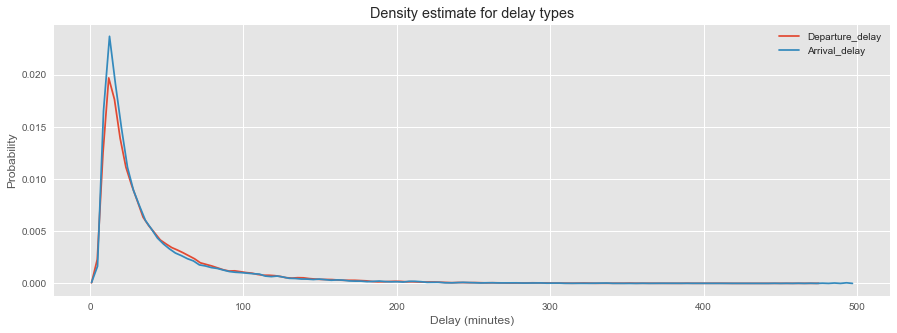

In [161]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(15,5))
    for d_type in ['Departure_delay', 'Arrival_delay']:
        ax = sns.kdeplot(data=df[df[d_type] > 0][d_type], clip=(0,500), cut=0)
sns.plt.title('Density estimate for delay types')
ax.set(xlabel='Delay (minutes)', ylabel='Probability')

In [ ]:
# From the result above we see that most of departure_delays are shorter a bit than the arrival_delays

In [ ]:
# Are there higher delays for airports situated closer to the Northeast?

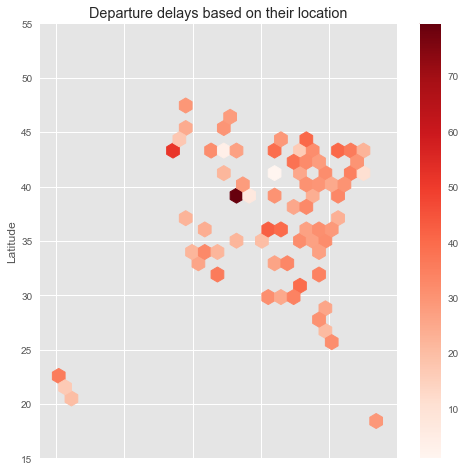

In [188]:
filtered_Departure_delay = df[df['Departure_delay'] > 0][['Latitude', 'Longitude', 'Departure_delay']].copy()
#filtered_Arrival_delay = df[df['Arrival_delay'] > 0][['Latitude', 'Longitude', 'Arrival_delay']].copy()

# It seems that there is only one pair of effective (Latitude,Longitude) on each row of the dataset, therefore let's just
#assume it as the departure airport location. 

ax = filtered_Departure_delay.plot.hexbin(y='Latitude', x='Longitude', 
                          C='Departure_delay', reduce_C_function=np.mean,
                          gridsize=25, figsize=(8,8),
                         cmap='Reds')
plt.axis([-165, -60, 15, 55])
plt.xlabel('Longtitude')  
plt.ylabel('Latitude')
plt.title('Departure delays based on their location')


In [ ]:
# From the graph above, we can see most of delays are located in the northeast of US. The darkest point in the center, probabily
#Chicago, indicates the most sever delays. 
# Interestingly, three points located at far southwest are not together with most of the rest points, could possibily be Hawaii,
#and will be revealed later in the 'Flight routes visualization on US' part.

In [ ]:
# Part 3: Using Machine Learning to predict the delays 

In [4]:
# Merge and expand the data

In [5]:
# Extract the Year/Month/Day as new features
Date = pd.to_datetime(df['Date'])
df['Year'] = pd.Series(Date.dt.year, index=df.index)
df['Month'] = pd.Series(Date.dt.month, index=df.index)
df['Day'] = pd.Series(Date.dt.day, index=df.index)

In [6]:
# Considering the weather information 
wea = pd.read_csv('C:/Users/zhanghui/Desktop/datatonic/weather.csv')

In [7]:
wea.head(5)

,Date,airport,time,temperature,snow,wind
0,2006-03-14,ORD,2041,35,NaN,18.6
1,2006-09-08,SLC,807,72,NaN,6.5
2,2006-10-22,MCO,1202,81,0.0,3.1
3,2006-10-22,MCO,602,81,0.0,3.1
4,2007-07-09,MRY,1011,64,NaN,0.7


In [8]:
# Add the weather information of departure airports  

In [9]:
df1 = pd.merge(df, wea, how='inner', left_on=['Date','Departure_Airport', 'Departure_schedule'], right_on=['Date','airport', 'time'])

In [10]:
df1 = df1.rename(columns={'temperature': 'Departure_temperature', 'snow': 'Departure_snow', 'wind': 'Departure_wind'})

In [11]:
# After the merge, there exists 31264 items of which the departure location/time has 
#the records of corresponding weather inforamtion 
len(df1)

31264

In [ ]:
# Add two more columns 'Departure_hour' and 'Arrivial_hour' by converting hour to readable format
df1['HOUR_DEP'] = df1['Departure_schedule'].map(lambda x: int(str(int(x)).zfill(4)[0:2]))
df1['HOUR_ARR'] = df1['Arrival_schedule'].map(lambda x: int(str(int(x)).zfill(4)[0:2]))

In [101]:
# View the new expanded dataset
df1.head(1)

,Date,Airline,Airline_code,Arrival_airport,Arrival_state,Departure_Airport,Departure_State,Departure_actual,Departure_delay,Arrival_actual,...,Year,Month,Day,airport,time,Departure_temperature,Departure_snow,Departure_wind,HOUR_DEP,HOUR_ARR
0,2006-01-05,YV,20378,CLT,NC,MGM,AL,1614,0,1840,...,2006,1,5,MGM,1614,53,NaN,10.4,16,18


In [180]:
# Preparing hot encoding 

In [12]:
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
import random

def convert_to_hot_dict(v):
    return [{str(x): str(x)} for x in v]

def prepare_hot_encoders(carriers, airports, Route):
    carrier_vec = DictVectorizer(sparse = False)
    airports_vec = DictVectorizer(sparse = False)
    Route_vec = DictVectorizer(sparse = False)
    carrier_vec.fit_transform(convert_to_hot_dict(carriers))
    airports_vec.fit_transform(convert_to_hot_dict(airports))
    Route_vec.fit_transform(convert_to_hot_dict(airports))
    return carrier_vec, airports_vec, Route_vec

In [15]:
# Transfer the form of raw data that machine learning techniques can deal with 
def prepare_dataset(df, carrier_encoder, airport_encoder, Route_encoder, features, hot_features, 
                 include_carrier=False, include_airport=False, include_Route=False):
   
    carrier_hot_len = len(carrier_encoder.feature_names_)
    airport_hot_len = len(airport_encoder.feature_names_)
    Route_hot_len = len(Route_encoder.feature_names_)
    
    (n, _) = df.shape
    print("Loading %d items..." % n)
    
    simple_feature_len = len(features)
    
    # Calculate hot encodes
    simple_hot_len = 0
    simple_hot = None
    if len(hot_features) > 0:
        simple_hot = OneHotEncoder()
        simple_hot.fit(df[hot_features])
        simple_hot_len = sum(simple_hot.n_values_) - len(simple_hot.n_values_)
    
    total_feature_count = simple_feature_len + simple_hot_len
    
    actual_carrier_len = (0 if not include_carrier else carrier_hot_len)
    actual_airport_len = (0 if not include_airport else airport_hot_len)
    actual_Route_len = (0 if not include_Route else Route_hot_len)
    #x = np.zeros((n, extra_feature_count + hot_encoded_count)) # carrier and twice airport (from-to)
    x = np.zeros((n, total_feature_count + actual_carrier_len + actual_airport_len + actual_Route_len))
    
    print("Extracting features...")
    x[:,0:simple_feature_len] = df[features].as_matrix()
    
    # Hot encoding for columns
    if len(hot_features) > 0:
        transformed_hots = simple_hot.transform(df[hot_features].as_matrix()).toarray()
        x[:,simple_feature_len:simple_feature_len+simple_hot_len] = transformed_hots.reshape((-1, simple_hot_len))
        
    # Hot encoded airports / carrier / Route
    if include_carrier:
        x[:, total_feature_count:total_feature_count+actual_carrier_len] = carrier_encoder.transform(
            convert_to_hot_dict(df['Airline']))
    if include_airport:
        x[:, total_feature_count+actual_carrier_len:total_feature_count + actual_carrier_len + actual_airport_len] \
                = airport_encoder.transform(convert_to_hot_dict(df['Departure_Airport']))
    if include_Route:
        x[:, total_feature_count+actual_carrier_len+actual_airport_len:total_feature_count+actual_carrier_len+actual_airport_len+actual_Route_len] \
             = Route_encoder.transform(convert_to_hot_dict(df['Route']))
    
    y = df['Departure_delay'].as_matrix()
#   y2 = df['Arrival_delay'].as_matrix()
    return x, y
    

In [16]:
# Inforation of carrier(Airline), airport and route for hot encoding
carrier_list = df['Airline'].unique()
airport_list = pd.concat([df['Departure_Airport'], df['Arrival_airport']], axis=0).unique()
Route_list = df['Route'].unique()

carrier_encoder, airport_encoder, Route_encoder = prepare_hot_encoders(carrier_list, airport_list, Route_list)

In [38]:
# All features we are considering for the prediction:
# scheduled departure hour, scheduled arrival hour, departure location, depature airport, departure temperature, departure wind
# scheduled departure month of the year(1 of total 12), scheduled departure day of the month(1 of total31). 

simple_copy_features = ['HOUR_DEP', 'HOUR_ARR', 'Latitude', 'Longitude', 'Departure_temperature', 'Departure_wind']
simple_hot_features = ['Month', 'Day']

# Load data
X, y = prepare_dataset(df1,carrier_encoder, airport_encoder, Route_encoder,
                            features=simple_copy_features,
                            hot_features=simple_hot_features,
                            include_airport=True,
                            include_carrier=True,
                            include_Route=True)
print('Finished all feature extraction.')

Loading 31264 items...
Extracting features...
Finished all feature extraction.


In [39]:
# Training the model 

In [65]:
# Split the dataset
from sklearn import cross_validation

# Create test and training set
X_train_set, X_test, y_train_set, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [67]:
# We are going to apply RandomForest as the training model 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [72]:
# First try with initial regressor 
rf0 = RandomForestRegressor()
pred0 = rf0.fit(X_train_set, y_train_set).predict(X_test)
print(mean_squared_error(y_test, pred0))
print(explained_variance_score(y_test, pred0, multioutput='raw_values'))

394.575695257
[ 0.49810064]


In [ ]:
# Gridsearch for n_estimators
param_test1 = {'n_estimators':range(10,61,10)}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_test1, cv=5)
gsearch1.fit(X_train_set, y_train_set)

In [83]:
# The best n_estimators is 60
rf1 = RandomForestRegressor(n_estimators=60)
pred1 = rf1.fit(X_train_set, y_train_set).predict(X_test)
print(mean_squared_error(y_test, pred1))
print(explained_variance_score(y_test, pred1, multioutput='raw_values'))

347.689139156
[ 0.55772759]


In [ ]:
# Gridsearch for max_depth and min_samples_split
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(2,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestRegressor(n_estimators= 60),
                        param_grid = param_test2, cv=5)
gsearch2.fit(X_train_set, y_train_set)

In [94]:
# The best max_depth is 13 and min_samples_split 110
rf2 = RandomForestRegressor(n_estimators=60, max_depth=13, min_samples_split=110)
pred2 = rf1.fit(X_train_set, y_train_set).predict(X_test)
print(mean_squared_error(y_test, pred2))
print(explained_variance_score(y_test, pred2, multioutput='raw_values'))

352.000914795
[ 0.5522419]


In [ ]:
# Gridsearch for min_samples_split and min_samples_leaf
param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestRegressor(n_estimators= 60, max_depth=13),
                        param_grid = param_test3,cv=5)
gsearch3.(X_train_set, y_train_set)

In [95]:
# The best 'min_samples_leaf': 20, 'min_samples_split': 120
rf3 = RandomForestRegressor(n_estimators=60, max_depth=13, min_samples_split=120, min_samples_leaf=20)
pred3 = rf1.fit(X_train_set, y_train_set).predict(X_test)
print(mean_squared_error(y_test, pred3))
print(explained_variance_score(y_test, pred3, multioutput='raw_values'))

347.689201262
[ 0.55772675]


In [ ]:
# We could still increase the explained_variance_score (best: 1.00), but I've decided to stop here 
#and evaluate the final performance (0.56) on the test set, since the most important part of this work is to extract features,
#as we have done, and model selection / parameter tunning could be some how time-consuming on my machine 

In [ ]:
# Part 4: Flight routes visualization on a US map 

In [ ]:
# Flight visualization 

In [4]:
import plotly.plotly as py
import pandas as pd

In [5]:
# I imported a online airport location dataset since we don't have the arrival_airport long/lat information on our original data 
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')

In [16]:
df2 = pd.merge(df, df_airports, how='inner', left_on=['Arrival_airport'], right_on=['iata'])
df2 = df2.drop(['iata', 'airport', 'city', 'state', 'country', 'cnt'], axis=1)
df2 = df2.reset_index(drop=True)

In [ ]:
df2 = df2.drop(['Date', 'Airline', 'Airline_code', 'Arrival_state', 'Departure_State', 'Departure_actual',
       'Departure_delay', 'Arrival_actual', 'Arrival_delay',
       'Arrival_schedule', 'Departure_schedule', 'DC_Longitude', 'DC_Latitude', 'Route', 'Path_order'], axis=1)
df2 = df2.drop_duplicates()

In [80]:
df2.head(5)

,Arrival_airport,Departure_Airport,Longitude,Latitude,lat,long
0,SHV,MOB,-88.24,30.69,32.446628,-93.825598
1,SHV,XNA,-94.30,36.28,32.446628,-93.825598
2,SHV,DEN,-104.67,39.86,32.446628,-93.825598
3,SHV,ATL,-84.42,33.63,32.446628,-93.825598
4,SHV,ORD,-87.90,41.98,32.446628,-93.825598


In [63]:
import plotly 
plotly.tools.set_credentials_file(username='ethangela', api_key='uS1Bu6kLhYKmuBwD34gV')

In [77]:
import plotly.plotly as py
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df2 ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df2['Longitude'][i], df2['long'][i] ],
            lat = [ df2['Latitude'][i], df2['lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            #opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'US flight paths visualization<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

In [78]:
fig = dict( data= flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ethangela/0 or inside your plot.ly account where it is named 'd3-flight-paths'


In [ ]:
# And finally, we can prove now that three points located at far southwest are indeed from Hawaii Island!